In [2]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import os

In [4]:
src = rio.open(r"C:\Users\giova\OneDrive\Desktop\ZEULI\3 Zeuli 220623\Raster Alberi\3 Zeuli 220623 Albero 31.tif")
df_alberi = pd.read_excel(r"C:\Users\giova\OneDrive\Desktop\ZEULI\ZEULI_OLIVO_UTM_220802.xlsx")
df_alberi

,DATA RILIEVO,ID,LONGITUDINE,LATITUDINE,UTM_lon,UTM_lat,TEMP ARIA,UMID ARIA,SWP
0,2022-08-02,32,16.198712,41.240348,600447.383844,4.566131e+06,33.5,38.2,38.2
1,2022-08-02,33,16.198625,41.240438,600439.955630,4.566141e+06,35.1,35.9,18.8
2,2022-08-02,34,16.198615,41.240596,600438.875718,4.566159e+06,33.6,36.9,35.6
3,2022-08-02,35,16.198690,41.240753,600444.920103,4.566176e+06,34.0,37.5,15.6
4,2022-08-02,36,16.192928,41.239752,599963.606182,4.566058e+06,34.7,37.8,24.6
5,2022-08-02,37,16.192811,41.239655,599953.949571,4.566048e+06,33.3,37.4,14.8
6,2022-08-02,41,16.192678,41.240116,599942.101965,4.566099e+06,33.1,37.9,33.8
7,2022-08-02,42,16.192963,41.240181,599965.885333,4.566106e+06,33.3,38.3,18.0
8,2022-08-02,43,16.192775,41.240217,599950.076470,4.566110e+06,32.7,39.2,34.0
9,2022-08-02,44,16.192894,41.240327,599959.880785,4.566122e+06,33.4,40.6,37.0


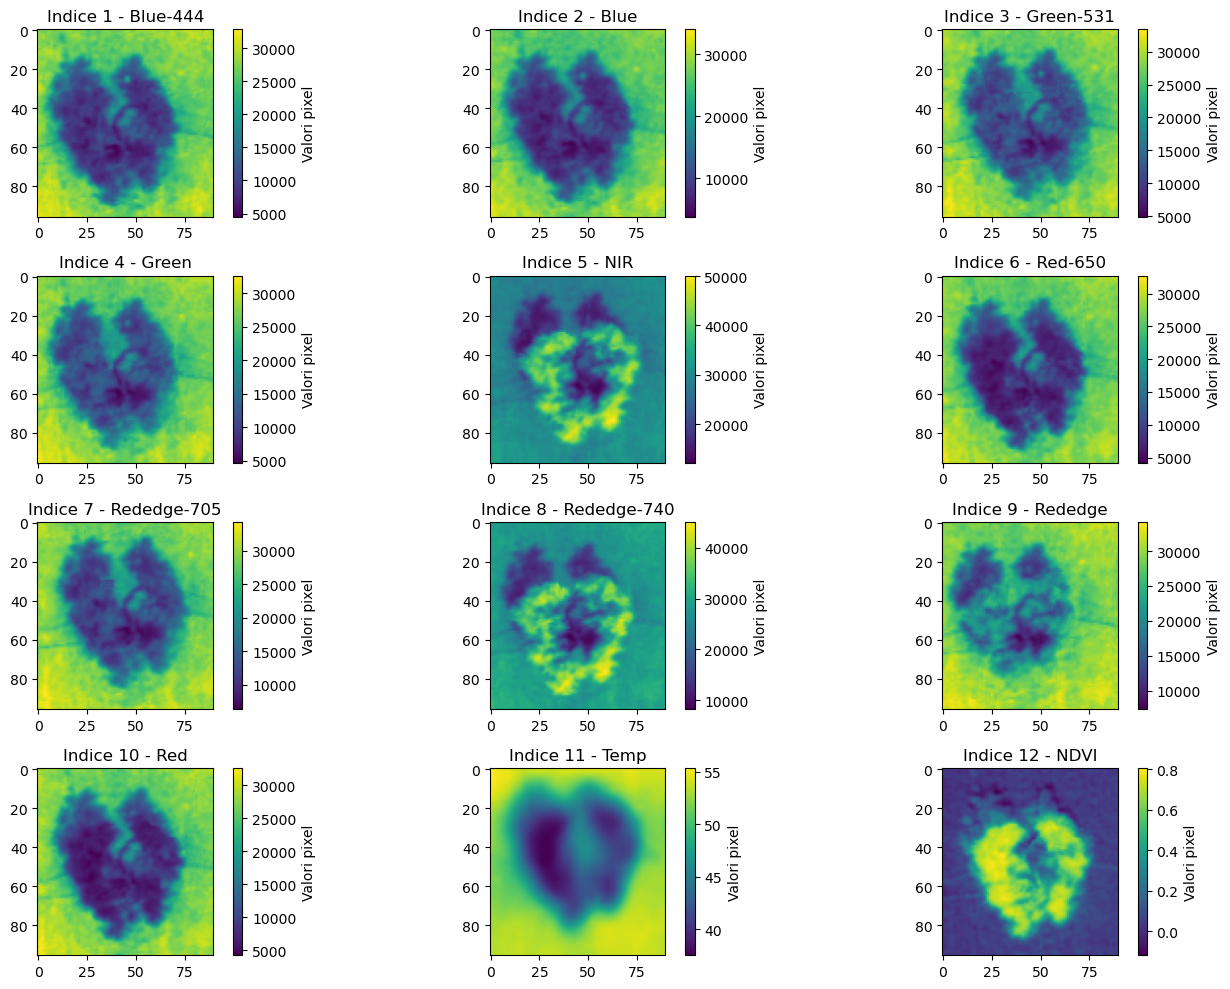

In [5]:
# Visualizzazione delle bande degli indici vegetativi
plt.figure(figsize=(15, 10))

# Nomi degli indici
band_names = ['Blue-444','Blue','Green-531','Green','NIR','Red-650','Rededge-705','Rededge-740','Rededge','Red','Temp','NDVI']

# Loop per visualizzare ciascuna banda
for i in range(len(band_names)):
    ax = plt.subplot(4, 3, i+1)
    im = ax.imshow(src.read(i+1), cmap='viridis')  # Imposta il range dei valori per la mappa colore
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Valori pixel')  # Regola le dimensioni della legenda e imposta il range dei valori
    plt.title(f'Indice {i+1} - {band_names[i]}')  # Aggiungi il nome dell'indice come titolo del subplot
    #plt.text(0.5, -0.1, indice_names[i], ha='center', transform=ax.transAxes)  # Aggiungi il nome dell'indice come testo

plt.tight_layout()
plt.show()

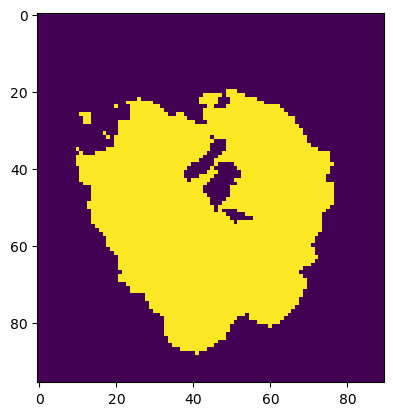

<Axes: >

In [12]:
ndvi = src.read(12)
threshold = 0.2
olivo_mask = ndvi>threshold
height, width = olivo_mask.shape
olivo_pixels = np.zeros((height, width), dtype=np.uint8)
olivo_pixels[olivo_mask] = 255
show(olivo_pixels)

In [27]:
transform = src.transform
data = []

for i in range(src.height):
    for j in range(src.width):
        if olivo_mask[i,j]:
            UTM_lon, UTM_lat = src.xy(i, j)
            pixel_values = [src.read(b + 1, window=((i, i+1), (j, j+1)))[0][0] for b in range(src.count)]
            data.append({
                'ID_Pixel': f'{i}_{j}',
                'ID_Albero': '',
                'UTM_lon': UTM_lon,
                'UTM_lat': UTM_lat,
                'Red': pixel_values[0],
                'Green': pixel_values[1],
                'Blue': pixel_values[2],
                'NIR': pixel_values[3],
                'Rededge': pixel_values[4],
                'NDVI': pixel_values[5],
                'OSAVI': pixel_values[6],
                'TCARI': pixel_values[7],
                'TCARIOSAVI': pixel_values[8],
                'EVI': pixel_values[9],
                'MCARI': pixel_values[10],
                'MCARIOSAVI': pixel_values[11],
                'SR': pixel_values[12],
                'TVI': pixel_values[13],
                'NDRE': pixel_values[14],
                'SWP': ''
            })
df_pixels = pd.DataFrame(data)

In [28]:
df_pixels

,ID_Pixel,ID_Albero,UTM_lon,UTM_lat,Red,Green,Blue,NIR,Rededge,NDVI,OSAVI,TCARI,TCARIOSAVI,EVI,MCARI,MCARIOSAVI,SR,TVI,NDRE,SWP
0,1_37,,599795.432,4.565511e+06,18950.0,27622.0,25402.0,30696.0,29295.0,0.236595,0.274449,29483.214844,107426.765625,-0.636736,15475.180664,56386.273438,0.617344,0.858251,0.023354,
1,1_38,,599795.512,4.565511e+06,19551.0,25483.0,23988.0,34235.0,28748.0,0.273008,0.316688,24710.464844,78027.750000,-1.294064,12563.189453,39670.539062,0.571082,0.879209,0.087119,
2,1_39,,599795.592,4.565511e+06,22655.0,25340.0,23533.0,34591.0,28442.0,0.208504,0.241864,15024.375000,62119.214844,-4.993724,6486.357910,26818.251953,0.654939,0.841727,0.097552,
3,2_36,,599795.352,4.565511e+06,18839.0,24397.0,21969.0,30152.0,29565.0,0.230920,0.267866,27311.757812,101960.414062,-1.310558,15210.775391,56784.957031,0.624801,0.854939,0.009830,
4,2_37,,599795.432,4.565511e+06,17320.0,22898.0,21252.0,33936.0,29509.0,0.324177,0.376044,29808.894531,79269.750000,-1.929132,18514.341797,49234.539062,0.510372,0.907842,0.069777,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,63_29,,599794.792,4.565506e+06,18108.0,30494.0,23486.0,32734.0,27882.0,0.287676,0.333703,31735.113281,95099.992188,-1.051867,15854.000000,47509.371094,0.553186,0.887511,0.080045,
2035,63_30,,599794.872,4.565506e+06,21140.0,31077.0,20624.0,33747.0,32156.0,0.229690,0.266440,32063.242188,120339.562500,5.334716,16428.156250,61658.054688,0.626426,0.854219,0.024142,
2036,65_53,,599796.712,4.565506e+06,15489.0,30334.0,21115.0,24607.0,30107.0,0.227404,0.263788,44118.742188,167250.843750,-0.558420,28502.226562,108049.804688,0.629455,0.852880,-0.100523,
2037,66_52,,599796.632,4.565506e+06,16670.0,30780.0,24899.0,25036.0,26750.0,0.200595,0.232689,34120.113281,146634.046875,-0.339059,17468.537109,75072.500000,0.665841,0.837015,-0.033098,


In [48]:
lon_mean = df_pixels['UTM_lon'].mean()
lat_mean = df_pixels['UTM_lat'].mean()

# Calcola le distanze euclidee tra le medie e le coordinate UTM_lon e UTM_lat di ogni albero
distances = cdist(np.array(df_alberi[['UTM_lon', 'UTM_lat']]), np.array([[lon_mean, lat_mean]]))

# Trova l'indice dell'albero più vicino alle medie
closest_tree_index = np.argmin(distances)

# Prendi i valori ID e SWP dell'albero più vicino
closest_tree_id = df_alberi.iloc[closest_tree_index]['ID']
closest_tree_swp = df_alberi.iloc[closest_tree_index]['SWP']

# Assegna i valori di ID e SWP dell'albero più vicino a tutti i pixel nel DataFrame dei pixel
df_pixels['ID_Albero'] = closest_tree_id
df_pixels['SWP'] = closest_tree_swp

In [49]:
df_pixels

,ID_Pixel,ID_Albero,UTM_lon,UTM_lat,Red,Green,Blue,NIR,Rededge,NDVI,OSAVI,TCARI,TCARIOSAVI,EVI,MCARI,MCARIOSAVI,SR,TVI,NDRE,SWP
0,1_37,54,599795.432,4.565511e+06,18950.0,27622.0,25402.0,30696.0,29295.0,0.236595,0.274449,29483.214844,107426.765625,-0.636736,15475.180664,56386.273438,0.617344,0.858251,0.023354,19.0
1,1_38,54,599795.512,4.565511e+06,19551.0,25483.0,23988.0,34235.0,28748.0,0.273008,0.316688,24710.464844,78027.750000,-1.294064,12563.189453,39670.539062,0.571082,0.879209,0.087119,19.0
2,1_39,54,599795.592,4.565511e+06,22655.0,25340.0,23533.0,34591.0,28442.0,0.208504,0.241864,15024.375000,62119.214844,-4.993724,6486.357910,26818.251953,0.654939,0.841727,0.097552,19.0
3,2_36,54,599795.352,4.565511e+06,18839.0,24397.0,21969.0,30152.0,29565.0,0.230920,0.267866,27311.757812,101960.414062,-1.310558,15210.775391,56784.957031,0.624801,0.854939,0.009830,19.0
4,2_37,54,599795.432,4.565511e+06,17320.0,22898.0,21252.0,33936.0,29509.0,0.324177,0.376044,29808.894531,79269.750000,-1.929132,18514.341797,49234.539062,0.510372,0.907842,0.069777,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,63_29,54,599794.792,4.565506e+06,18108.0,30494.0,23486.0,32734.0,27882.0,0.287676,0.333703,31735.113281,95099.992188,-1.051867,15854.000000,47509.371094,0.553186,0.887511,0.080045,19.0
2035,63_30,54,599794.872,4.565506e+06,21140.0,31077.0,20624.0,33747.0,32156.0,0.229690,0.266440,32063.242188,120339.562500,5.334716,16428.156250,61658.054688,0.626426,0.854219,0.024142,19.0
2036,65_53,54,599796.712,4.565506e+06,15489.0,30334.0,21115.0,24607.0,30107.0,0.227404,0.263788,44118.742188,167250.843750,-0.558420,28502.226562,108049.804688,0.629455,0.852880,-0.100523,19.0
2037,66_52,54,599796.632,4.565506e+06,16670.0,30780.0,24899.0,25036.0,26750.0,0.200595,0.232689,34120.113281,146634.046875,-0.339059,17468.537109,75072.500000,0.665841,0.837015,-0.033098,19.0


In [50]:
df_pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_Pixel    2039 non-null   object 
 1   ID_Albero   2039 non-null   int64  
 2   UTM_lon     2039 non-null   float64
 3   UTM_lat     2039 non-null   float64
 4   Red         2039 non-null   float32
 5   Green       2039 non-null   float32
 6   Blue        2039 non-null   float32
 7   NIR         2039 non-null   float32
 8   Rededge     2039 non-null   float32
 9   NDVI        2039 non-null   float32
 10  OSAVI       2039 non-null   float32
 11  TCARI       2039 non-null   float32
 12  TCARIOSAVI  2039 non-null   float32
 13  EVI         2039 non-null   float32
 14  MCARI       2039 non-null   float32
 15  MCARIOSAVI  2039 non-null   float32
 16  SR          2039 non-null   float32
 17  TVI         2039 non-null   float32
 18  NDRE        2039 non-null   float32
 19  SWP         2039 non-null  

In [51]:
df_pixels.isnull().sum()

ID_Pixel      0
ID_Albero     0
UTM_lon       0
UTM_lat       0
Red           0
Green         0
Blue          0
NIR           0
Rededge       0
NDVI          0
OSAVI         0
TCARI         0
TCARIOSAVI    0
EVI           0
MCARI         0
MCARIOSAVI    0
SR            0
TVI           0
NDRE          0
SWP           0
dtype: int64

In [52]:
df_pixels.nunique()

ID_Pixel      2039
ID_Albero        1
UTM_lon         66
UTM_lat         65
Red           1847
Green         1891
Blue          1879
NIR           1946
Rededge       1905
NDVI          2039
OSAVI         2039
TCARI         2039
TCARIOSAVI    2039
EVI           2039
MCARI         2039
MCARIOSAVI    2039
SR            2039
TVI           2039
NDRE          2038
SWP              1
dtype: int64

In [53]:
df_pixels.describe()

,ID_Albero,UTM_lon,UTM_lat,Red,Green,Blue,NIR,Rededge,NDVI,OSAVI,TCARI,TCARIOSAVI,EVI,MCARI,MCARIOSAVI,SR,TVI,NDRE,SWP
count,2039.0,2039.000000,2.039000e+03,2039.00000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0
mean,54.0,599795.389077,4.565509e+06,13201.56543,20114.943359,15236.315430,34381.660156,22414.828125,0.439891,0.510272,24974.724609,51308.464844,-17.980574,16147.469727,31898.603516,0.400727,0.967092,0.206518,19.0
std,0.0,1.247554,1.182274e+00,3315.97876,4373.882812,3484.363281,6356.739258,4083.961914,0.130700,0.151611,7873.016113,18257.048828,760.605164,7936.166992,13483.369141,0.129807,0.068012,0.112091,0.0
min,54.0,599792.872000,4.565506e+06,6563.00000,9233.000000,6946.000000,15358.000000,12835.000000,0.200595,0.232689,980.190308,3714.468506,-32655.000000,527.189514,2049.576416,0.174432,0.837015,-0.100523,19.0
25%,54.0,599794.392000,4.565508e+06,10717.50000,16988.000000,12653.500000,30439.000000,19218.500000,0.326715,0.378988,19635.256836,39313.744141,-4.408231,10478.543945,22449.715820,0.293797,0.909239,0.126122,19.0
50%,54.0,599795.512000,4.565509e+06,12658.00000,19870.000000,14729.000000,35563.000000,22139.000000,0.452053,0.524380,25098.560547,47989.691406,1.354571,15059.237305,29649.960938,0.377360,0.975732,0.203055,19.0
75%,54.0,599796.392000,4.565510e+06,15173.50000,22972.000000,17435.000000,39210.500000,25221.000000,0.545838,0.633170,30065.313477,59527.550781,6.151403,20554.352539,38927.607422,0.507483,1.022662,0.284440,19.0
max,54.0,599798.232000,4.565511e+06,23359.00000,35024.000000,29425.000000,47887.000000,34298.000000,0.702952,0.815421,56894.371094,180843.296875,5439.791504,53861.882812,111005.656250,0.665841,1.096792,0.479092,19.0
